## Dataset

The dataset used in this assignment is the Olivetti faces dataset. This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The ``sklearn.datasets.fetch_olivetti_faces`` function will fetch the data archive from AT&T.

There are ten different images of each of 40 people. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

Data Set Characteristics:

      Classes: 40
      Samples total: 400
      Dimensionality: 4096
      Features: real, between 0 and 1
    
The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The `target` for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64 x 64 images.

Details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

We will use this dataset to develop a face recognition model.

First, let's download the dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_olivetti_faces
np.random.seed(42)

In [2]:
dataset = fetch_olivetti_faces()

Let's print the description:

In [3]:
print(dataset.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [4]:
X = dataset.data
y = dataset.target

In [5]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Let's show a random face:

In [6]:
def show_face(data):
    image = data.reshape(64, 64)
    plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
    plt.axis("off")

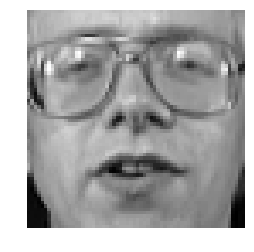

In [7]:
show_face(X[10])

## Questions and Code

**1. Randomly split `X` and `y` into 2 subsets for training (50%) and test (50%) so that the number of faces of each subject are the same in the training set. Use `random_state = 42`. [2 points]**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.5)

**2. Build the first face recoginition model by using the ``KNeighborsClassifier`` to find the best matching image in the training set of each of the images in the test set. Compute the test accuracy. Explain why accuracy is a suitable metric in this case. [4 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
preds = knn.predict(X_test)

acc = accuracy_score(y_test, preds)

print('Accuracy is: ' + str(acc*100) + '%')

Accuracy is: 87.5%


Accuracy is an appropriate measure in this case as it is a classification task. The large number of classes (10) also makes accuracy an appropriate measure as it looks at whether or not the instance was correctly predicted without needing to introduce any measures to balance the large number of classes it could have been inaccurately predicted as. 

**3. Build a PCA transformer using the training set so that the amount of variance that needs to be explained is greater than 95%. How many components are obtained? [3 points]**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
from sklearn.decomposition import PCA

pcas = PCA(n_components=0.95)
pcas.fit(X_train)
X_train_pca = pcas.transform(X_train)
X_test_pca = pcas.transform(X_test)

In [11]:
# Number of components
print('Number of components: ' + str(len(pcas.explained_variance_ratio_.cumsum())))


Number of components: 85


**4. Re-train the ``KNeighborsClassifier`` in Question 2 with the data obtained after using the PCA transformer in Question 3. Test with the test set and report the test accuracy. [3 points]**

In [12]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca,y_train)
preds = knn.predict(X_test_pca)

acc = accuracy_score(y_test, preds)

print('Accuracy is: ' + str(acc*100) + '%')

Accuracy is: 87.5%


**5. Display in two columns all the wrong predicted images in the test set together with the nearest image found in the training set. [3 points]**

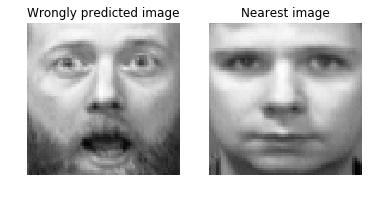

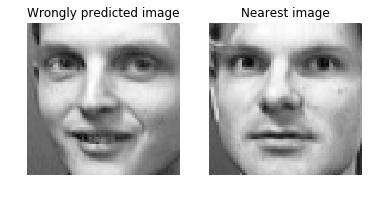

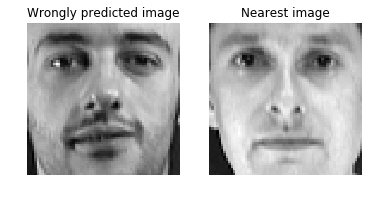

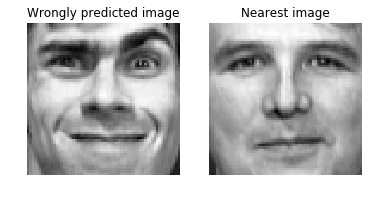

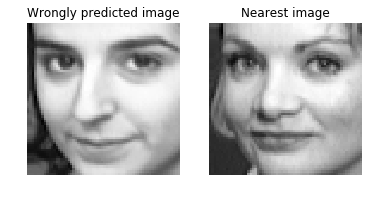

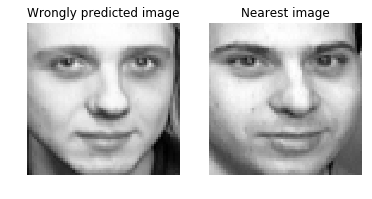

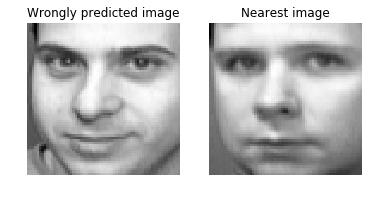

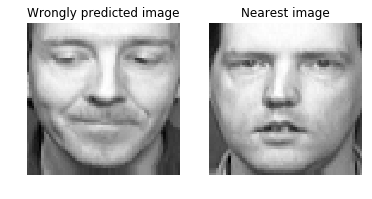

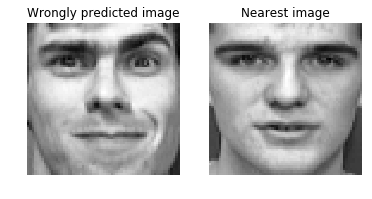

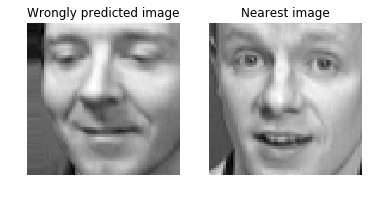

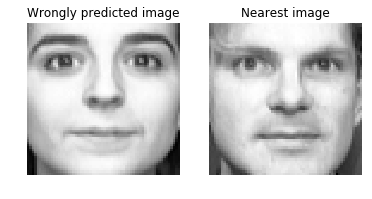

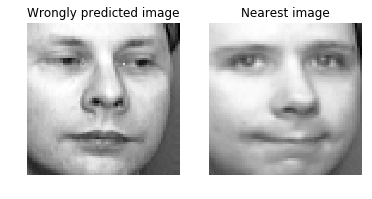

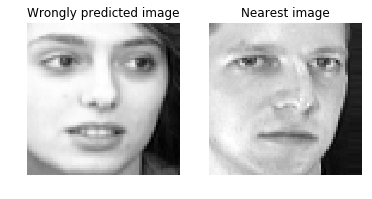

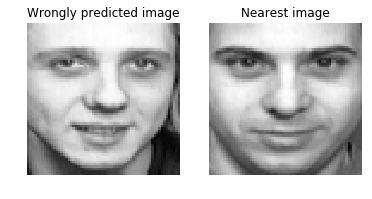

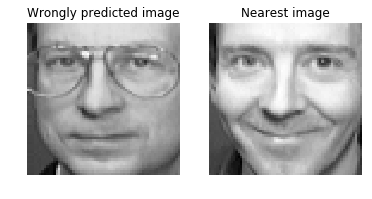

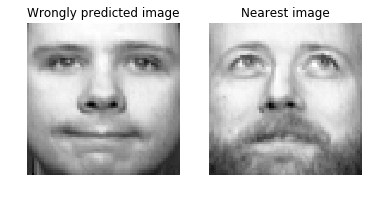

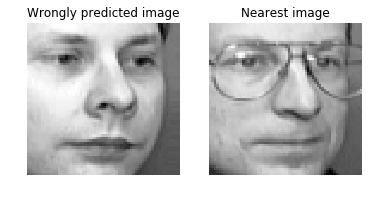

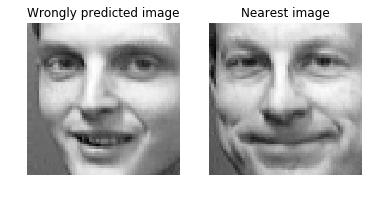

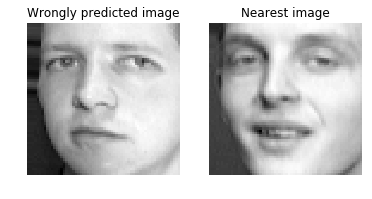

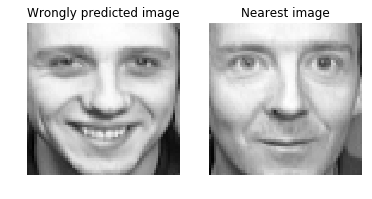

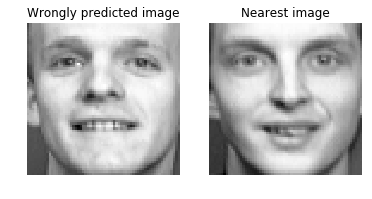

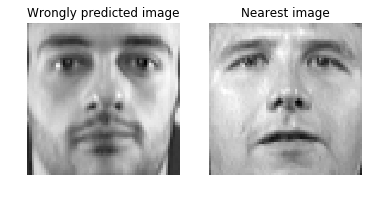

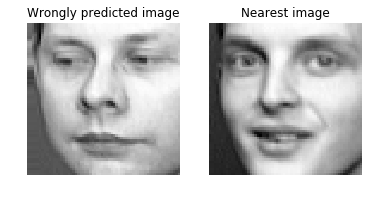

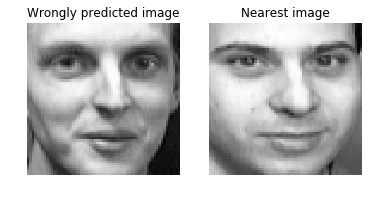

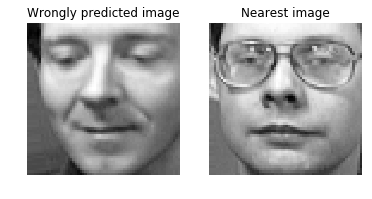

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
preds = knn.predict(X_test)

for i in range (len(preds)):
    if(preds[i]) != y_test[i]:
        plt.subplot(1, 2, 1)
        plt.title('Wrongly predicted image')
        show_face(X_test[i])
        plt.subplot(1,2,2)
        l = knn.kneighbors(X_test[i].reshape(1,-1))
        show_face(X_train[l[1]])
        plt.title('Nearest image')
        plt.show()


**6. Repeat Question 4 using a ``C-Support Vector Classifier`` with a `RBF kernel`. Tune parameters `C` and `gamma`  using a `GridSearchCV` with 5 folds. [5 points]**

Documents:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1,5], 'gamma':[0,5]}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters, cv=5)


In [15]:
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)

print('Accuracy is: ' + str(acc*100) + '%')

Accuracy is: 87.5%
